In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Create Category

In [5]:
pd.Categorical(df.day)

['Sun', 'Sun', 'Sun', 'Sun', 'Sun', ..., 'Sat', 'Sat', 'Sat', 'Sat', 'Thur']
Length: 244
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']

## Ordered Categorical

In [6]:
x = pd.Categorical(df.day, categories=['Thur', 'Fri', 'Sat', 'Sun'],
              ordered=True)

#เรียงลำดับตามที่เรากำหนด

In [7]:
df['day_cat'] = x
df.head()

,total_bill,tip,sex,smoker,day,time,size,day_cat
0,16.99,1.01,Female,No,Sun,Dinner,2,Sun
1,10.34,1.66,Male,No,Sun,Dinner,3,Sun
2,21.01,3.50,Male,No,Sun,Dinner,3,Sun
3,23.68,3.31,Male,No,Sun,Dinner,2,Sun
4,24.59,3.61,Female,No,Sun,Dinner,4,Sun


In [8]:
df.sort_values('day_cat')

,total_bill,tip,sex,smoker,day,time,size,day_cat
121,13.42,1.68,Female,No,Thur,Lunch,2,Thur
133,12.26,2.00,Female,No,Thur,Lunch,2,Thur
132,11.17,1.50,Female,No,Thur,Lunch,2,Thur
131,20.27,2.83,Female,No,Thur,Lunch,2,Thur
130,19.08,1.50,Male,No,Thur,Lunch,2,Thur
...,...,...,...,...,...,...,...,...
158,13.39,2.61,Female,No,Sun,Dinner,2,Sun
157,25.00,3.75,Female,No,Sun,Dinner,4,Sun
156,48.17,5.00,Male,No,Sun,Dinner,6,Sun
186,20.90,3.50,Female,Yes,Sun,Dinner,3,Sun


## See of groupby is sorted too

In [9]:
df.groupby('day').size()
#Not sorted

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

In [10]:
df.groupby('day_cat').size()
#Sorted!!

C:\Users\spire\AppData\Local\Temp\ipykernel_144956\3785011682.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day_cat').size()


day_cat
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

## Managing categories

In [11]:
df.day_cat.cat.categories

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

In [12]:
s = df.day_cat.cat.add_categories('Wed')
s

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day_cat, Length: 244, dtype: category
Categories (5, object): ['Thur' < 'Fri' < 'Sat' < 'Sun' < 'Wed']

In [13]:
s.cat.remove_categories('Thur')
#ค่าที่เป็น Thur ก็จะเป็น NaN (ระวัง)

0      Sun
1      Sun
2      Sun
3      Sun
4      Sun
      ... 
239    Sat
240    Sat
241    Sat
242    Sat
243    NaN
Name: day_cat, Length: 244, dtype: category
Categories (4, object): ['Fri' < 'Sat' < 'Sun' < 'Wed']

In [14]:
s.cat.reorder_categories(['Wed','Thur','Fri','Sat','Sun'])

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day_cat, Length: 244, dtype: category
Categories (5, object): ['Wed' < 'Thur' < 'Fri' < 'Sat' < 'Sun']

In [15]:
s.cat.as_unordered
s
#ยกเลิกการเรียงลำดับ

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day_cat, Length: 244, dtype: category
Categories (5, object): ['Thur' < 'Fri' < 'Sat' < 'Sun' < 'Wed']

## Seaborn

In [16]:
import seaborn as sns

In [17]:
df.tip.mean(), df.tip.std()

(np.float64(2.99827868852459), np.float64(1.3836381890011822))

## Distribution

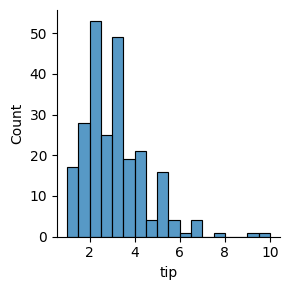

In [23]:
sns.displot(df.tip, height=3)

#height = ขนาดของภาพกราฟ!

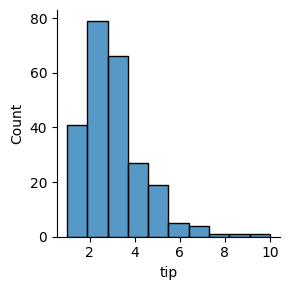

In [22]:
sns.displot(df.tip, kind='hist', bins=10, height=3)
#bins คือจำนวนกล่อง

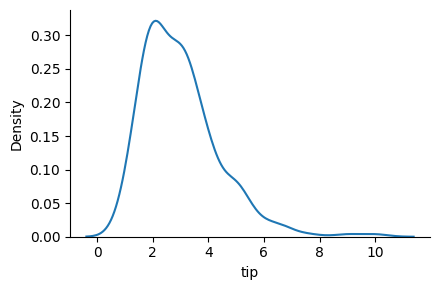

In [27]:
sns.displot(df.tip, kind='kde', height=3, aspect=1.5)
#kde คือ continuous (ก็ประมาณว่า integral แล้ว)
#aspect คืออัตราส่วนความกว้าง / ความสูง

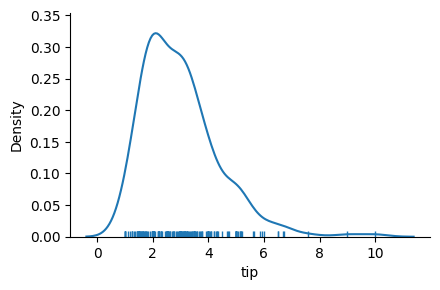

In [30]:
sns.displot(df.tip, kind='kde', height=3, aspect=1.5, rug=True)
#rug จะมีขีดให้ดู เหมือนเป็นการ mark ไว้

## relplot

In [31]:
df

,total_bill,tip,sex,smoker,day,time,size,day_cat
0,16.99,1.01,Female,No,Sun,Dinner,2,Sun
1,10.34,1.66,Male,No,Sun,Dinner,3,Sun
2,21.01,3.50,Male,No,Sun,Dinner,3,Sun
3,23.68,3.31,Male,No,Sun,Dinner,2,Sun
4,24.59,3.61,Female,No,Sun,Dinner,4,Sun
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Sat
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Sat
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Sat
242,17.82,1.75,Male,No,Sat,Dinner,2,Sat


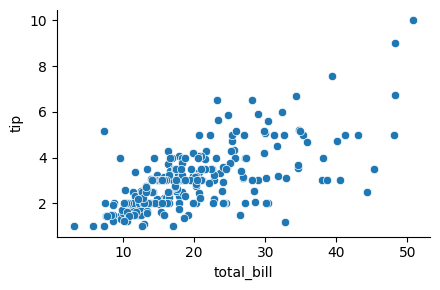

In [34]:
sns.relplot(df, x='total_bill', y='tip', height=3, aspect=1.5)

## hue (ลงสี) 

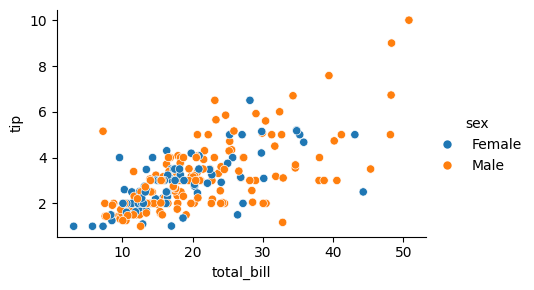

In [36]:
sns.relplot(df, x='total_bill', y='tip', height=3, aspect=1.5,
           hue='sex')

## แยกคอลัมน์

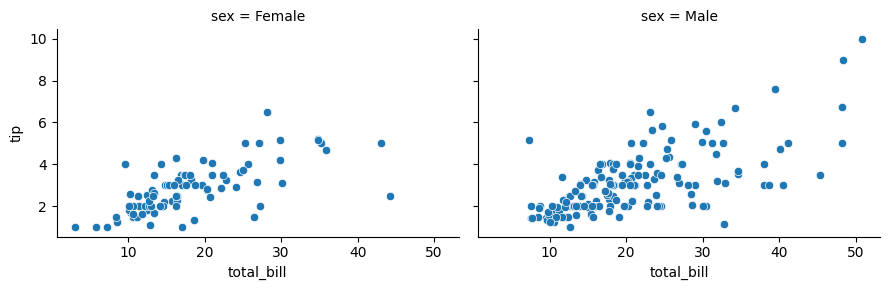

In [37]:
sns.relplot(df, x='total_bill', y='tip', height=3, col='sex', aspect=1.5)

## ใช้ปนกัน? (cols, rows)

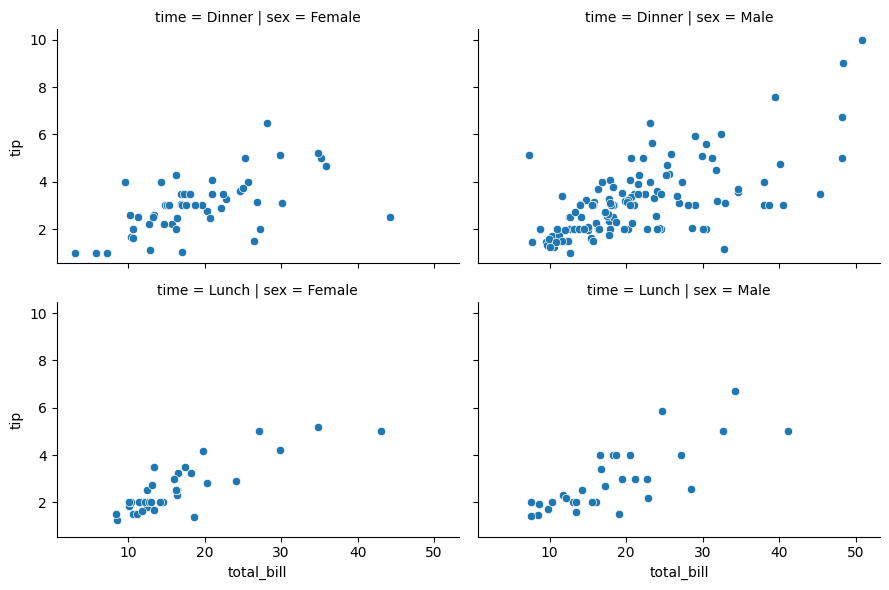

In [39]:
sns.relplot(df, x='total_bill', y='tip', height=3, aspect=1.5, col='sex', row='time')
#Cols = ซ้ายขวา
#Rows = บนล่าง

## แยกด้วยสัญลักษณ์

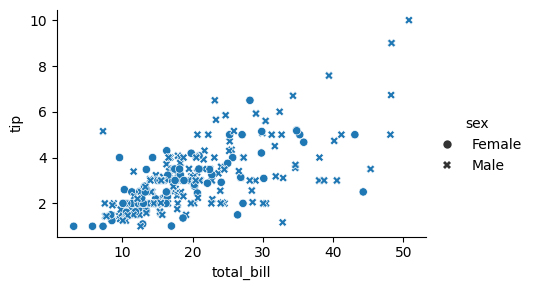

In [40]:
sns.relplot(df, x='total_bill', y='tip', height=3, aspect=1.5, style='sex')

## แยกด้วย Size

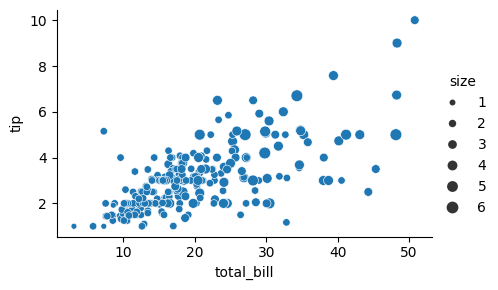

In [42]:
sns.relplot(df, x='total_bill', y='tip', height=3, aspect=1.5, size='size')
#คอลัมน์ 'size' ใน df คือจำนวนคนที่มานั่งกิน

## ใช้ทุกอัน? (อย่าหาทำ)

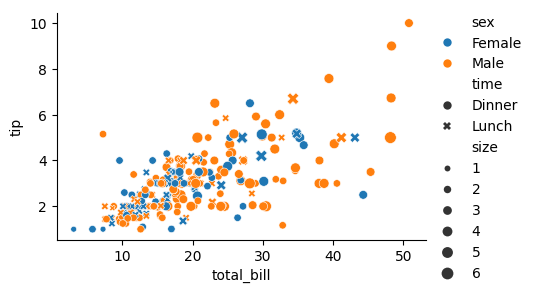

In [43]:
sns.relplot(df, x='total_bill', y='tip', height=3, aspect=1.5, hue='sex', style='time', size='size')

C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

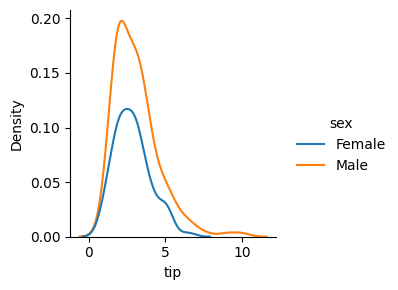

In [45]:
sns.displot(df, x='tip', kind='kde', height=3, hue='sex')

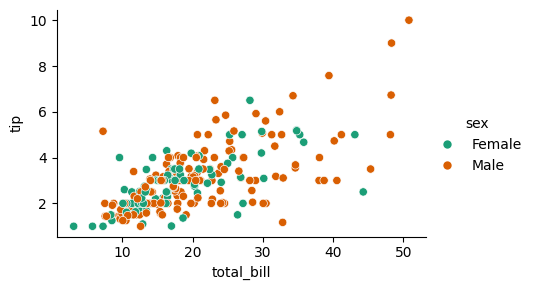

In [52]:
sns.relplot(df, x='total_bill', y='tip', height=3, aspect=1.5, palette='Dark2', hue='sex')
#เลือกสีเอาได้นะ

## Catplot

C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


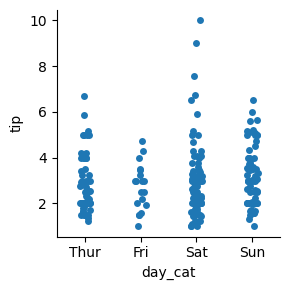

In [54]:
sns.catplot(df, x='day_cat', y='tip', height=3)

# kinds

C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 19.7% of the points cannot be placed; 

C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


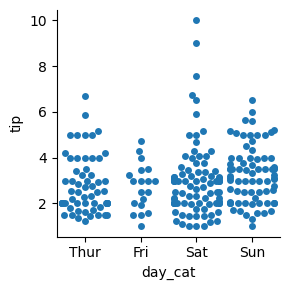

In [55]:
sns.catplot(df, x='day_cat', y='tip', height=3, kind='swarm')

C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


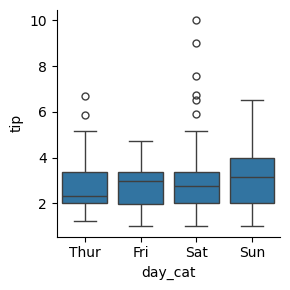

In [56]:
sns.catplot(df, x='day_cat', y='tip', height=3, kind='box')

C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

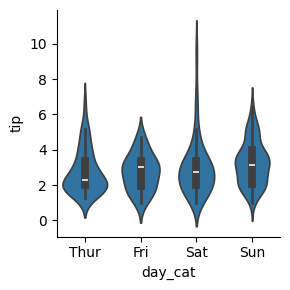

In [57]:
sns.catplot(df, x='day_cat', y='tip', height=3, kind='violin')

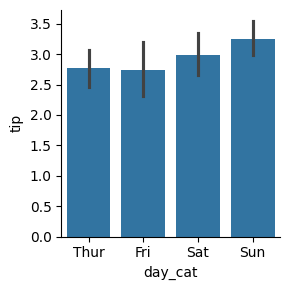

In [58]:
sns.catplot(df, x='day_cat', y='tip', height=3, kind='bar')

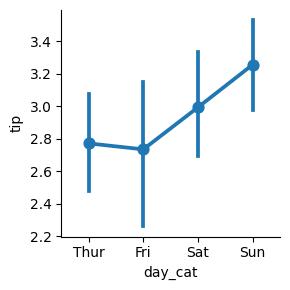

In [59]:
sns.catplot(df, x='day_cat', y='tip', height=3, kind='point')

## Sum

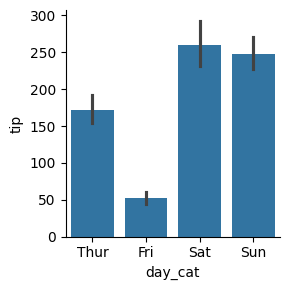

In [62]:
sns.catplot(df, x='day_cat', y='tip', height=3, kind='bar', estimator='sum')

## Pairplot
plot คสพระหว่งคู่ตัวแปรที่เป็นตัวเลขทุกคู่ในตารางอย่างรวดเร็ว

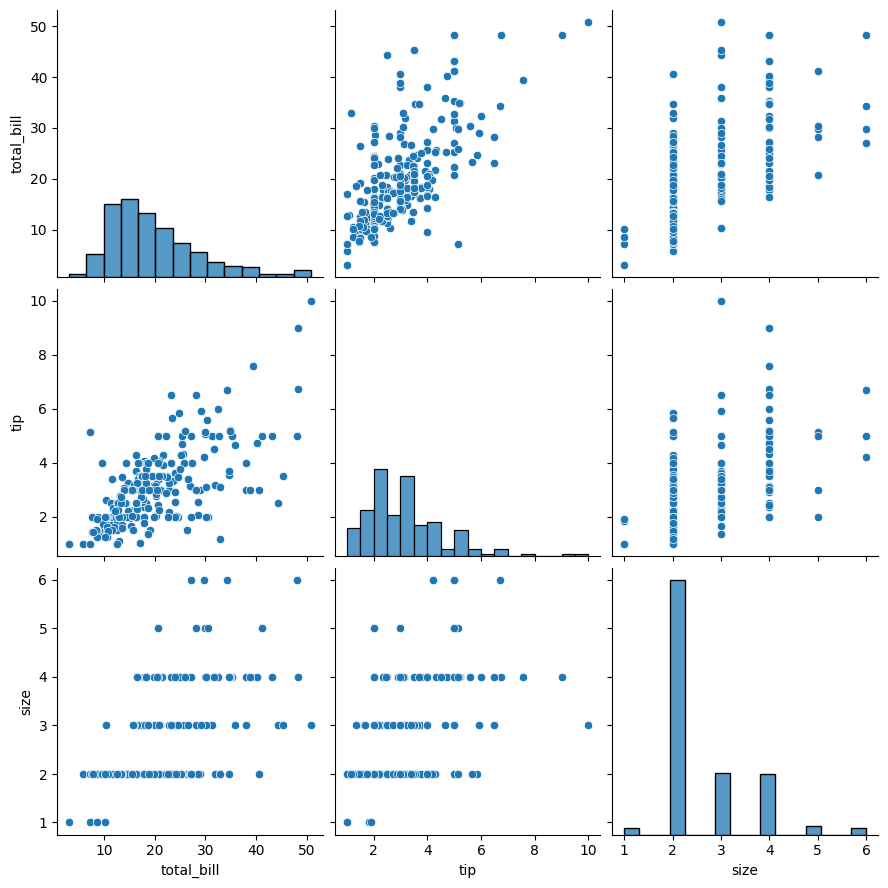

In [64]:
sns.pairplot(df, height=3)

## Pairgrid
ควมคุมรายละเอียดได้มากกว่า pairplot (บางทีอาจไม่จำเป็นต้อง plot ทุกกราฟ)

* map_diag() เพื่อเลือกรูปแบบกราฟตำแหน่งทแยงมุม
* map_offgrid() รูปแบบกราฟตำแหน่งเยื้องจากทแยงมุม
* map_lower() รูปแบบกราฟตำแหน่งซ้ายล่างจากทแยงมุม
* map_upper() ตำแหน่งขวาบบนเยื้องจากทแยงมุม

C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\Users\spire\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

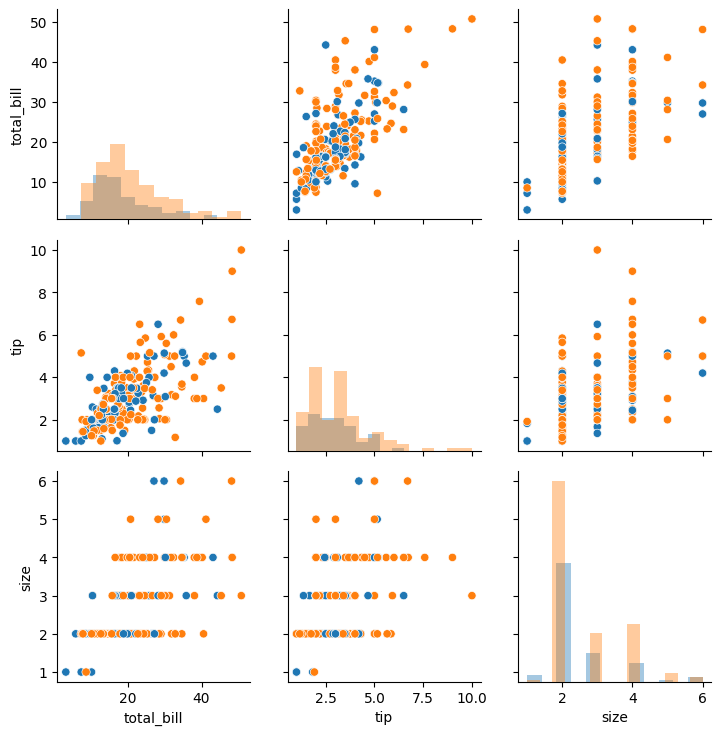

In [65]:
g = sns.PairGrid(df, hue='sex')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.distplot, kde=False)

## Set style and context

In [66]:
sns.set_style('dark')

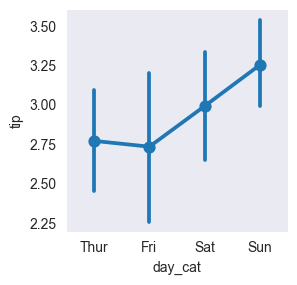

In [67]:
sns.catplot(df, x='day_cat', y='tip', height=3, kind='point')